In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import pickle
import csv

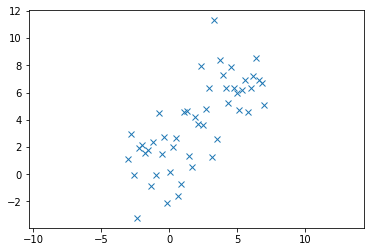

In [19]:
with open("eigen.pkl", "rb") as f:
    X = pickle.load(f)

     
plt.plot(X[:, 0], X[:, 1], "x")
plt.axis("equal")
plt.show()

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1).fit(X)
X_pca = pca.transform(X)
X_pca[:10]

array([[5.28331909],
       [3.84284422],
       [5.88859559],
       [8.07409089],
       [4.16799935],
       [3.8592636 ],
       [4.17040423],
       [3.86884344],
       [5.65483844],
       [3.16278418]])

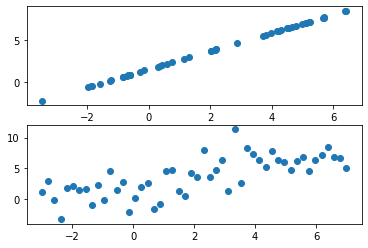

In [43]:
X_new = pca.inverse_transform(X_pca)

plt.figure(1)
plt.subplot(211)
plt.plot(X_new[:, 0], X_new[:, 1], "o")

plt.subplot(212)
plt.plot(X[:, 0], X[:, 1], "o")

plt.show()

### Домашняя работа

In [76]:
df = pd.read_csv("client_segmentation.csv")

X = df[["call_diff", "sms_diff", "traffic_diff"]].values
y = df.customes_class.values

df.head()

,call_diff,sms_diff,traffic_diff,customes_class
0,-0.666421,0.444911,-0.273538,0.0
1,-0.889273,-0.537896,-1.959469,2.0
2,-0.841503,0.846665,0.727606,0.0
3,1.389749,0.390911,1.789246,1.0
4,-1.228211,-1.375899,-1.434209,2.0


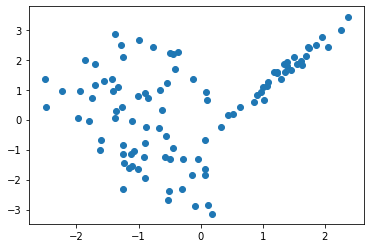

In [103]:
plt.scatter(X[:, 0], X[:, 2])
plt.show()

In [95]:
X_needed = X[:, 0].copy()
X_needed = np.concatenate((X_needed.reshape(-1, 1), X[:, 2].reshape(-1, 1)), axis=1)

pca = PCA(n_components=1).fit(X_needed)
X_pca = pca.transform(X_needed)
X_pca[:10]

array([[-0.86388574],
       [-2.46273415],
       [-0.05616347],
       [ 1.91449524],
       [-2.15285129],
       [ 0.83453235],
       [ 1.6551052 ],
       [-1.84171309],
       [-2.29403214],
       [ 1.49844584]])

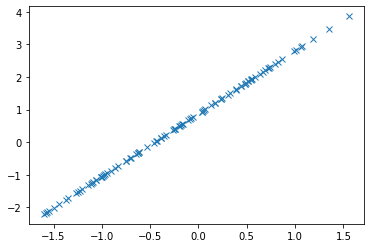

In [99]:
X_new = pca.inverse_transform(X_pca)
plt.plot(X_new[:, 0], X_new[:, 1], "x")
plt.show()

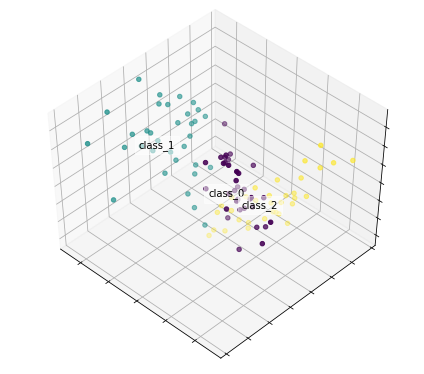

In [104]:
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134); plt.cla()
num_labels = np.unique(y).size
for name, label in [('class_%d' % i, i) for i in range(num_labels)]:
    ax.text3D(X[y == label, 0].mean(), X[y == label, 1].mean() + 0.5,
        X[y == label, 2].mean(), name, horizontalalignment='center',
        bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.w_xaxis.set_ticklabels([]); ax.w_yaxis.set_ticklabels([]); ax.w_zaxis.set_ticklabels([])
plt.show()

In [116]:
pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)
X_pca[:10]

array([[-0.75744517, -0.16623077],
       [-2.61154618, -0.5951692 ],
       [ 0.13301346,  0.37383597],
       [ 1.74983161, -0.27582433],
       [-2.69734129,  0.31624463],
       [ 0.70860533,  0.51547171],
       [ 1.27113452, -0.04822069],
       [-2.16755366, -0.04137214],
       [-2.58986361, -0.08695463],
       [ 1.6981062 ,  1.16822327]])

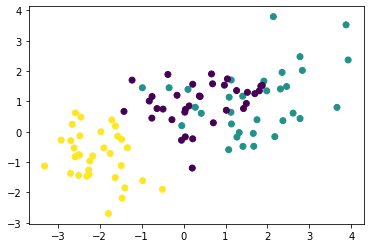

In [129]:
plt.scatter(X_pca[:, 0], X[:, 1], c=y)

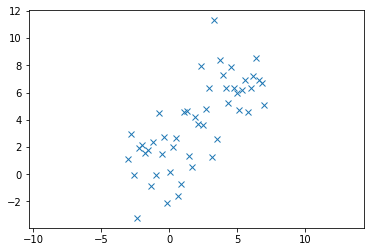

In [131]:
with open('eigen.pkl', 'rb') as f:
    X = pickle.load(f)
    
plt.plot(X[:,0], X[:,1], 'x')
plt.axis('equal')
plt.show()

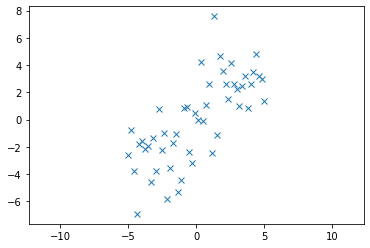

In [153]:
# matrix centering

mean_val = X.mean(axis=0)
N = X.shape[0]
X_centered = X.copy() - mean_val

plt.plot(X_centered[:,0], X_centered[:,1], 'x')
plt.axis('equal')
plt.show()

In [170]:
# вычисляем ковариационную матрицу "по определению"
X_cov = X_centered.T.dot(X_centered)# / (N-1)
print("Ковариационная матрица:\n{}\n".format(X_cov))
# готовая реализация из numpy
print("Ковариационная матрица из numpy:\n{}\n".format(
    np.cov(X_centered, rowvar=0)))

Ковариационная матрица:
[[433.67346939 333.74754788]
 [333.74754788 488.02498249]]

Ковариационная матрица из numpy:
[[8.85047897 6.81117445]
 [6.81117445 9.95969352]]



In [164]:
from numpy import linalg

eigenvalues, eigenvectors = linalg.eig(X_cov)

print(''.join(
    'lambda_{} ={}, w = {}\n'.format(eig_id,eigenvalues[eig_id], eigenvectors[:,eig_id]) 
    for eig_id in range(eigenvalues.size))
)

lambda_0 =125.99709818611939, w = [-0.7352406   0.67780621]
lambda_1 =795.7013536890099, w = [-0.67780621 -0.7352406 ]



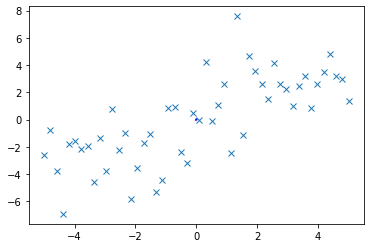

In [165]:
origin = X_centered.mean(axis=0) # начало координат

# транспонируем матрицу собственных векторов, чтобы собственный вектор соответствовал строке
plt.quiver(*origin, *eigenvectors.T, color=['r','b','g'], scale=eigenvalues)
plt.plot(X_centered[:,0], X_centered[:,1], 'x')
plt.show()

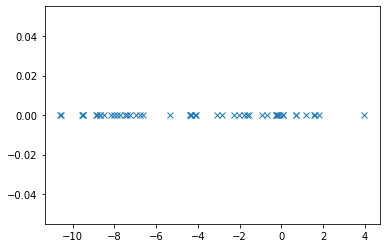

In [180]:
# первой главной компоненте соответствует самое больше собственное значение
max_eigenval = np.argmax(eigenvalues)
# главная компонента, соответствующая первому собственному значению
max_eigenvec = eigenvectors[:,max_eigenval].reshape(-1,1)

# X_redused = X.dot(max_eigenvec.reshape(1,-1).T)
X_reduced = X.dot(max_eigenvec)

plt.plot(X_reduced, np.zeros(N), 'x')
plt.show()

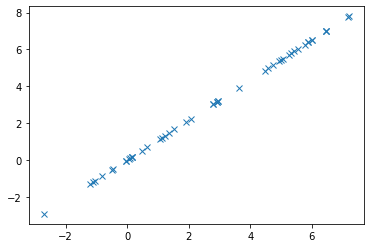

In [181]:
X_inverse = X_reduced.dot(max_eigenvec.reshape(1,-1))

plt.plot(X_inverse[:,0], X_inverse[:,1], 'x')
plt.show()